<div style="text-align: center;">

<hr>
<h2>Knowledge Discovery - IBDA3122</h2>
<h3>Ujian Tengah Semester - UTS</h3>
<h4>Victor Chendra - <b>202000338</b></h4>
<hr>

</div>


Requirements:

1. pandasql
2. numpy
3. pandas
4. matplotlib
5. sklearn
6. seaborn
7. mlxtend

```
!conda install --yes pandasql
!conda install --yes numpy
!conda install --yes pandas
!conda install --yes matplotlib
!conda install --yes sklearn
!conda install --yes seaborn
!conda install --yes -c conda-forge mlxtend
```

In [1]:
# !conda install --yes pandasql
# !conda install --yes numpy
# !conda install --yes pandas
# !conda install --yes matplotlib
# !conda install --yes sklearn
# !conda install --yes seaborn
# !conda install --yes -c conda-forge mlxtend

### Proyek A (16 poin)

Database Northwind adalah database sampel, yang berisi data penjualan untuk perusahaan fiktif bernama 
“Northwind Traders", yang mengimpor dan mengekspor makanan khusus dari seluruh dunia. Database Northwind 
memiliki data sampel customers, orders, product, suppliers, shipping, dan employees. Hubungan tabel ditampilkan 
dalam diagram E-R berikut.

Produk yang diperdagangkan terbagi atas 8 kategori: 
Beverages, Condiments, Confections, Dairy Products, Grains/Cereals, Meat/Poultry, Produce dan Seafood. 
Data order yang tercatat adalah periode Agustus 1994 - Juni 1996. 

Manajemen Perusahaan Northwind ingin menjaga loyalitas pelanggan, memperluas pasar dan meningkatkan 
penjualan. Salah satu aspek yang ingin mereka ketahui adalah keadaan penjualan selama periode data (Agustus 
1994 - Juni 1996) dan perkiraan penjualannya pada Juli-Desember 1996 dan sepanjang 1997 (proyeksi data). 

In [2]:
# Import library needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score


# Load dataset
categories = pd.read_excel("Northwind_excel/Categories.xlsx")
customers = pd.read_excel("Northwind_excel/Customers.xlsx")

employees = pd.read_excel("Northwind_excel/Employees.xlsx")
order_details = pd.read_excel("Northwind_excel/Order Details.xlsx")

orders = pd.read_excel("Northwind_excel/Orders.xlsx")
products = pd.read_excel("Northwind_excel/Products.xlsx")

shippers = pd.read_excel("Northwind_excel/Shippers.xlsx")
suppliers = pd.read_excel("Northwind_excel/Suppliers.xlsx")


#### 1. Kategori produk apa yang mencatatkan nilai penjualan tertinggi selama periode data? Berapakah angka proyeksi penjualannya? (NIM Genap: Juni-Desember 1996; NIM Ganjil: sepanjang 1997) Produk apa dalam kategori itu yang mencatatkan penjualan tertinggi? 

##### a.

In [3]:
# a
# Kategori produk apa yang mencatatkan nilai penjualan tertinggi?

def kategori_produk_dengan_nilai_penjualan_tertinggi_no1a():
    _query = """
        SELECT products.`Category Name`, 
               SUM(order_details.`Quantity`) AS `Total Penjualan`, 
               SUM(order_details.`Unit Price` * order_details.`Quantity` * (1 - order_details.`Discount`)) AS `Total Sales`
        FROM products
        INNER JOIN order_details ON products.`Product Name` = order_details.`Product Name`
        GROUP BY products.`Category Name`
        ORDER BY `Total Sales` DESC;
    """

    return sqldf(_query)


result = kategori_produk_dengan_nilai_penjualan_tertinggi_no1a()
display(result)
print(f"Kategori produk dengan nilai penjualan tertinggi      = {result['Category Name'][0]}")
print(f"Dengan total penjualan dan total sales berturut-turut = {result['Total Penjualan'][0]} produk - ${result['Total Sales'][0]:,}")


,Category Name,Total Penjualan,Total Sales
0,Beverages,9532,267868.1800
1,Dairy Products,9149,234507.2850
2,Confections,7906,167357.2250
3,Meat/Poultry,4199,163022.3595
4,Seafood,7681,131261.7375
5,Condiments,5298,106047.0850
6,Produce,2990,99984.5800
7,Grains/Cereals,4562,95744.5875


Kategori produk dengan nilai penjualan tertinggi      = Beverages
Dengan total penjualan dan total sales berturut-turut = 9532 produk - $267,868.18


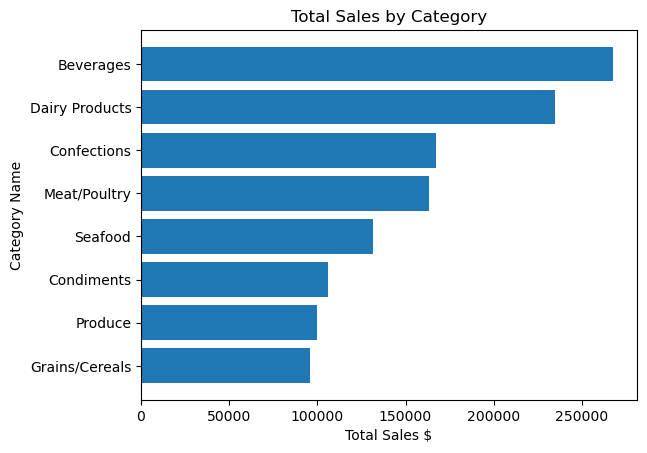

In [4]:
result = result.sort_values('Total Sales', ascending=True)

# create a horizontal bar plot
plt.barh(result['Category Name'], result['Total Sales'])

# set the title and axis labels
plt.title('Total Sales by Category')
plt.xlabel('Total Sales $')
plt.ylabel('Category Name')

# show the plot
plt.show()

##### b.

In [5]:
# b
# Berapakah angka proyeksi penjualannya? NIM Genap Juli-Desember 1996

def angka_proyeksi_penjualannya_juli_desember_no1b():
    _query = """
        SELECT
               products.`Category Name`,
               strftime('%Y-%m', orders.`Order Date`) AS 'Year-Month',
               order_details.`Quantity` AS 'Total Penjualan',
               SUM(order_details.`Unit Price` * order_details.`Quantity` * (1 - order_details.`Discount`)) AS `Total Sales`
        FROM products
        INNER JOIN order_details ON order_details.`Product Name` = products.`Product Name`
        INNER JOIN orders ON orders.`Order ID` = order_details.`Order ID`
        WHERE products.`Category Name` = 'Beverages'
        GROUP BY `Year-Month`
        ORDER BY `Year-Month` ASC;
    """

    return sqldf(_query)


result = angka_proyeksi_penjualannya_juli_desember_no1b()
display(result)


,Category Name,Year-Month,Total Penjualan,Total Sales
0,Beverages,1994-08,20,3182.500
1,Beverages,1994-09,45,4866.880
2,Beverages,1994-10,20,5088.400
3,Beverages,1994-11,25,7971.360
4,Beverages,1994-12,15,17378.060
5,Beverages,1995-01,15,9431.800
6,Beverages,1995-02,10,21904.160
7,Beverages,1995-03,10,2845.840
8,Beverages,1995-04,15,10413.680
9,Beverages,1995-05,40,7297.550


In [6]:
# Split month and year and remove Total Penjualan karena yang mau di predict adalah Total Sales
result[['Year', 'Month']] = result['Year-Month'].str.split('-', expand=True)
result.drop('Year-Month', axis=1, inplace=True)
result = sqldf("SELECT `Category Name`, Month,  Year,  `Total Sales` FROM result")
result

,Category Name,Month,Year,Total Sales
0,Beverages,08,1994,3182.500
1,Beverages,09,1994,4866.880
2,Beverages,10,1994,5088.400
3,Beverages,11,1994,7971.360
4,Beverages,12,1994,17378.060
5,Beverages,01,1995,9431.800
6,Beverages,02,1995,21904.160
7,Beverages,03,1995,2845.840
8,Beverages,04,1995,10413.680
9,Beverages,05,1995,7297.550


In [7]:
# Split X and y and create X_test
X = result.iloc[:, 1:-1]
X['Month'] = X['Month'].astype(int)
X['Year'] = X['Year'].astype(int)

y = result.iloc[:, -1]

X_test = np.array([
    [7, 1996],
    [8, 1996],
    [9, 1996],
    [10, 1996],
    [11, 1996],
    [12, 1996],
])

c:\Users\victo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


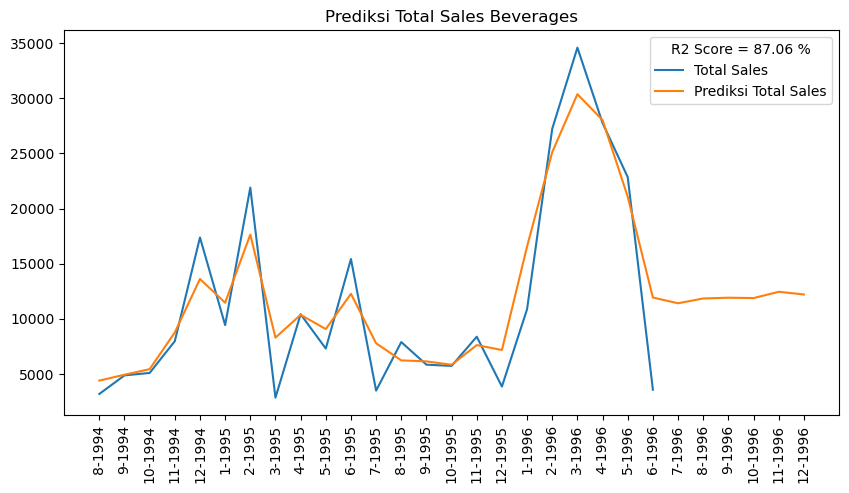

In [8]:
# Modeling and visualization
model = RandomForestRegressor(n_estimators=100, random_state=2).fit(X, y)
prediction_score = model.score(X,y)*100

X_concat = np.concatenate((X, X_test),axis=0)
X_concat
Xlabel = [f'{i}-{j}' for i, j in X_concat]  

# Plotting
prediction = model.predict(X_concat)
plt.figure(figsize=(10,5))
plt.plot(y, label="Total Sales")
plt.plot(Xlabel, prediction, label="Prediksi Total Sales")
plt.xticks(rotation=90)
plt.legend()
plt.title("Prediksi Total Sales Beverages")
plt.legend(title=f'R2 Score = {round(prediction_score,2)} %')
plt.show()

In [9]:
# Hasil prediksi
# Menggabungkan hasil dengan prediksi dengan month year prediksi
new = list(X_test.copy())
pred = list(prediction[-6:])
new = [list(_) for _ in new]

for i in range(len(new)):
    new[i].append(pred[i])

temp = pd.DataFrame(new, columns=["Month", "Year", "Prediction Total Sales $"])
display(temp)
print(f"Rata-rata prediksit Total Sales: ${np.mean(temp['Prediction Total Sales $'])}")

,Month,Year,Prediction Total Sales $
0,7,1996,11408.65450
1,8,1996,11843.69450
2,9,1996,11912.62830
3,10,1996,11878.63325
4,11,1996,12449.79035
5,12,1996,12208.07355


Rata-rata prediksit Total Sales: $11950.245741666668


##### c.

In [10]:
# c
# Produk apa dalam kategori itu yang mencatat penjualan tertinggi?

def produk_penjualan_tertinggi_no1c():
    _query = """
        SELECT order_details.`Product Name`, 
               products.`Category Name`, 
               SUM(order_details.`Quantity`) AS `Total Penjualan`, 
               SUM(order_details.`Unit Price` * order_details.`Quantity` * (1 - order_details.`Discount`)) AS `Total Sales`
        FROM order_details 
        INNER JOIN products ON order_details.`Product Name` = products.`Product Name`
        WHERE products.`Category Name` = 'Beverages'
        GROUP BY order_details.`Product Name`
        ORDER BY `Total Sales` DESC;
    """
    return sqldf(_query)


result = produk_penjualan_tertinggi_no1c()
display(result)
print(f"Produk dengan penjualan tertinggi                     = {result['Product Name'][0]}")
print(f"Dengan total penjualan dan total sales berturut-turut = {result['Total Penjualan'][0]} produk - ${result['Total Sales'][0]:,}")


,Product Name,Category Name,Total Penjualan,Total Sales
0,Côte de Blaye,Beverages,623,141396.735
1,Ipoh Coffee,Beverages,580,23526.700
2,Chang,Beverages,1057,16355.960
3,Lakkalikööri,Beverages,981,15760.440
4,Steeleye Stout,Beverages,883,13644.000
5,Chai,Beverages,828,12788.100
6,Chartreuse verte,Beverages,793,12294.540
7,Outback Lager,Beverages,817,10672.650
8,Rhönbräu Klosterbier,Beverages,1155,8177.490
9,Sasquatch Ale,Beverages,506,6350.400


Produk dengan penjualan tertinggi                     = Côte de Blaye
Dengan total penjualan dan total sales berturut-turut = 623 produk - $141,396.735


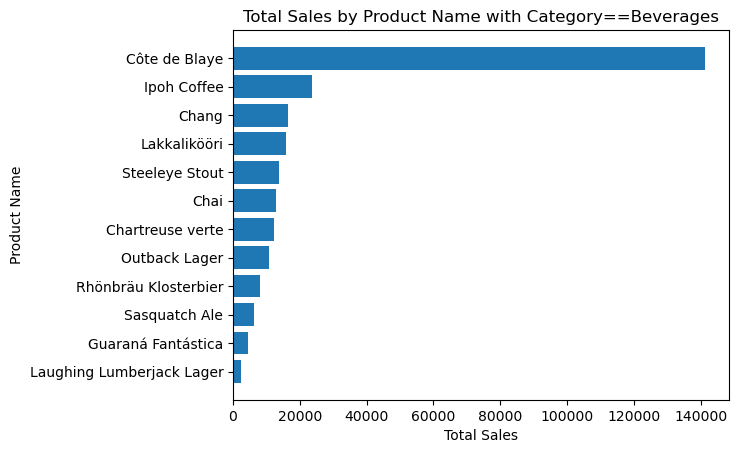

In [11]:
result = result.sort_values('Total Sales', ascending=True)

# create a horizontal bar plot
plt.barh(result['Product Name'], result['Total Sales'])

# set the title and axis labels
plt.title('Total Sales by Product Name with Category==Beverages')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')

# show the plot
plt.show()

#### 2. Tiga kategori yang mencatatkan rata-rata nilai penjualan tertinggi selama periode data?

In [12]:
def tiga_kategori_no2():
    _query = """
        SELECT products.`Category Name`, 
               SUM(order_details.`Quantity`) AS `Total Penjualan`, 
               SUM(order_details.`Unit Price` * order_details.`Quantity` * (1 - order_details.`Discount`)) AS `Total Sales`
        FROM products
        INNER JOIN order_details ON products.`Product Name` = order_details.`Product Name`
        GROUP BY products.`Category Name`
        ORDER BY `Total Sales` DESC;
    """

    return sqldf(_query)


result = tiga_kategori_no2()
result['Rata-rata'] = [result['Total Sales'][i]/result['Total Penjualan'][i] for i in range(len(result))]

result = sqldf("SELECT * FROM result ORDER BY `Rata-rata` DESC;")
display(result)


,Category Name,Total Penjualan,Total Sales,Rata-rata
0,Meat/Poultry,4199,163022.3595,38.824091
1,Produce,2990,99984.5800,33.439659
2,Beverages,9532,267868.1800,28.101991
3,Dairy Products,9149,234507.2850,25.632013
4,Confections,7906,167357.2250,21.168382
5,Grains/Cereals,4562,95744.5875,20.987415
6,Condiments,5298,106047.0850,20.016437
7,Seafood,7681,131261.7375,17.089147


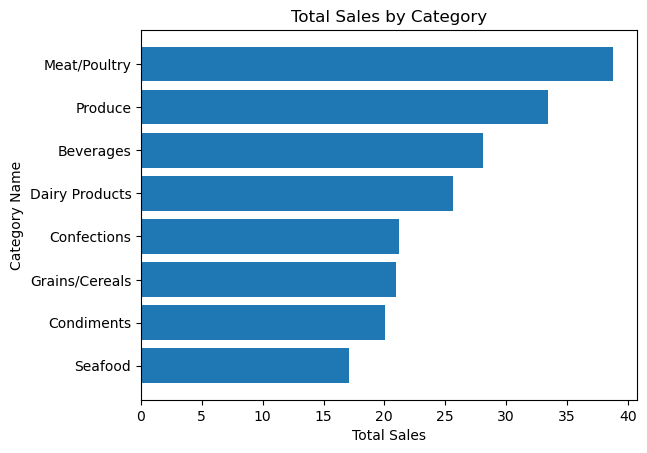

In [13]:
result = result.sort_values('Rata-rata', ascending=True)

# create a horizontal bar plot
plt.barh(result['Category Name'], result['Rata-rata'])

# set the title and axis labels
plt.title('Total Sales by Category')
plt.xlabel('Total Sales')
plt.ylabel('Category Name')

# show the plot
plt.show()

#### 3. NIM genap periode Januari - Juni 1996

a. Lima produk yang mencatatkan rata-rata nilai penjualan tertinggi selama periode tersebut? <br>
b. Lima produk yang mencatatkan rata-rata nilai penjualan terendah selama periode tersebut?

In [14]:
# 3a
_query = """
    SELECT products.`Product Name`,
           orders.`Order Date`,
           SUM(order_details.`Quantity`) AS `Total Penjualan`,
           SUM(order_details.`Unit Price` * order_details.`Quantity` * (1 - order_details.`Discount`)) AS `Total Sales`
    FROM products
    INNER JOIN order_details ON products.`Product Name` = order_details.`Product Name`
    INNER JOIN orders ON orders.`Order ID` = order_details.`Order ID`
    WHERE orders.`Order Date` BETWEEN '1996-01-01' AND '1996-06-30'
    GROUP BY products.`Product Name`
    ;
"""

result = sqldf(_query)
result["Rata-rata"] = [result['Total Sales'][i]/result['Total Penjualan'][i] for i in range(len(result))]

result = sqldf("SELECT * FROM result ORDER BY `Rata-rata` DESC;")
result.head(5)


,Product Name,Order Date,Total Penjualan,Total Sales,Rata-rata
0,Côte de Blaye,1996-01-18 00:00:00.000000,275,71276.750,259.188182
1,Thüringer Rostbratwurst,1996-01-10 00:00:00.000000,390,41766.746,107.094221
2,Mishi Kobe Niku,1996-02-23 00:00:00.000000,3,291.000,97.000000
3,Sir Rodney's Marmalade,1996-02-13 00:00:00.000000,111,8704.260,78.416757
4,Carnarvon Tigers,1996-01-22 00:00:00.000000,181,10371.875,57.303177


In [15]:
# 3b
result = sqldf("SELECT * FROM result ORDER BY `Rata-rata` ASC;")
result.head(5)


,Product Name,Order Date,Total Penjualan,Total Sales,Rata-rata
0,Geitost,1996-02-05 00:00:00.000000,202,476.6250,2.359530
1,Guaraná Fantástica,1996-01-03 00:00:00.000000,586,2484.0000,4.238908
2,Konbu,1996-01-26 00:00:00.000000,679,3827.1000,5.636377
3,Tourtière,1996-01-17 00:00:00.000000,126,781.8775,6.205377
4,Filo Mix,1996-01-08 00:00:00.000000,162,1018.1500,6.284877


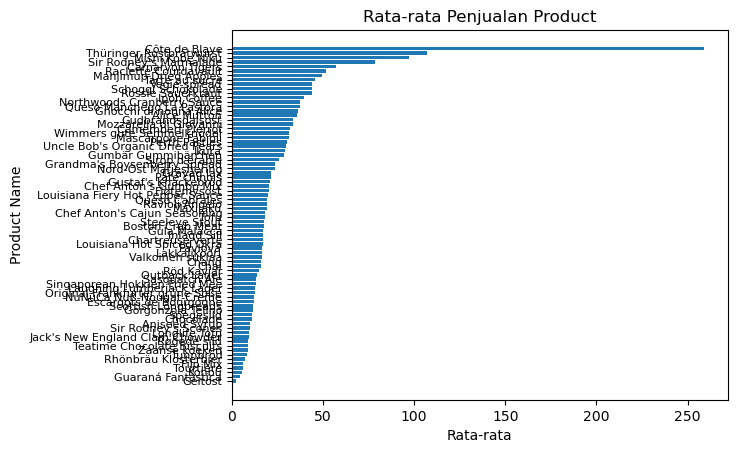

In [16]:
# create a horizontal bar plot
plt.barh(result['Product Name'], result['Rata-rata'])

# set the title and axis labels
plt.title('Rata-rata Penjualan Product')
plt.tick_params(axis='y', labelsize=8)
plt.xlabel('Rata-rata')
plt.ylabel('Product Name')

# show the plot
plt.show()

#### 4. Pada proyeksi data, kategori produk mana saja yang memiliki kecenderung penjualan rata-rata bulanan naik dan mana yang cenderung menurun?

In [17]:
all_category_name = list(sqldf("SELECT DISTINCT(products.`Category Name`) FROM products")['Category Name'])
new = np.array([
    [7, 1996],
    [8, 1996],
    [9, 1996],
    [10, 1996],
    [11, 1996],
    [12, 1996],
])


def get_product_sales_based_product_category(category_name: str):
    _query = f"""
        SELECT
               products.`Category Name`,
               strftime('%Y-%m', orders.`Order Date`) AS 'Year-Month',
               order_details.`Quantity` AS 'Total Penjualan',
               SUM(order_details.`Unit Price` * order_details.`Quantity` * (1 - order_details.`Discount`)) AS `Total Sales`
        FROM products
        INNER JOIN order_details ON order_details.`Product Name` = products.`Product Name`
        INNER JOIN orders ON orders.`Order ID` = order_details.`Order ID`
        WHERE products.`Category Name` = '{category_name}'
        GROUP BY `Year-Month`
        ORDER BY `Year-Month` ASC;
    """

    return sqldf(_query)


result = []
for cat in all_category_name:
    temp = get_product_sales_based_product_category(cat)
    
    temp[['Year', 'Month']] = temp['Year-Month'].str.split('-', expand=True)
    temp.drop('Year-Month', axis=1, inplace=True)
    temp['Rata-rata'] = [temp['Total Sales'][i]/temp['Total Penjualan'][i] for i in range(len(temp))]

    temp = sqldf("SELECT Month,  Year, `Rata-rata` FROM temp")
    
    temp['Month'] = temp['Month'].astype(int)
    temp['Year'] = temp['Year'].astype(int)
    
    result.append((cat, temp))


c:\Users\victo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\victo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\victo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\victo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\victo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\victo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

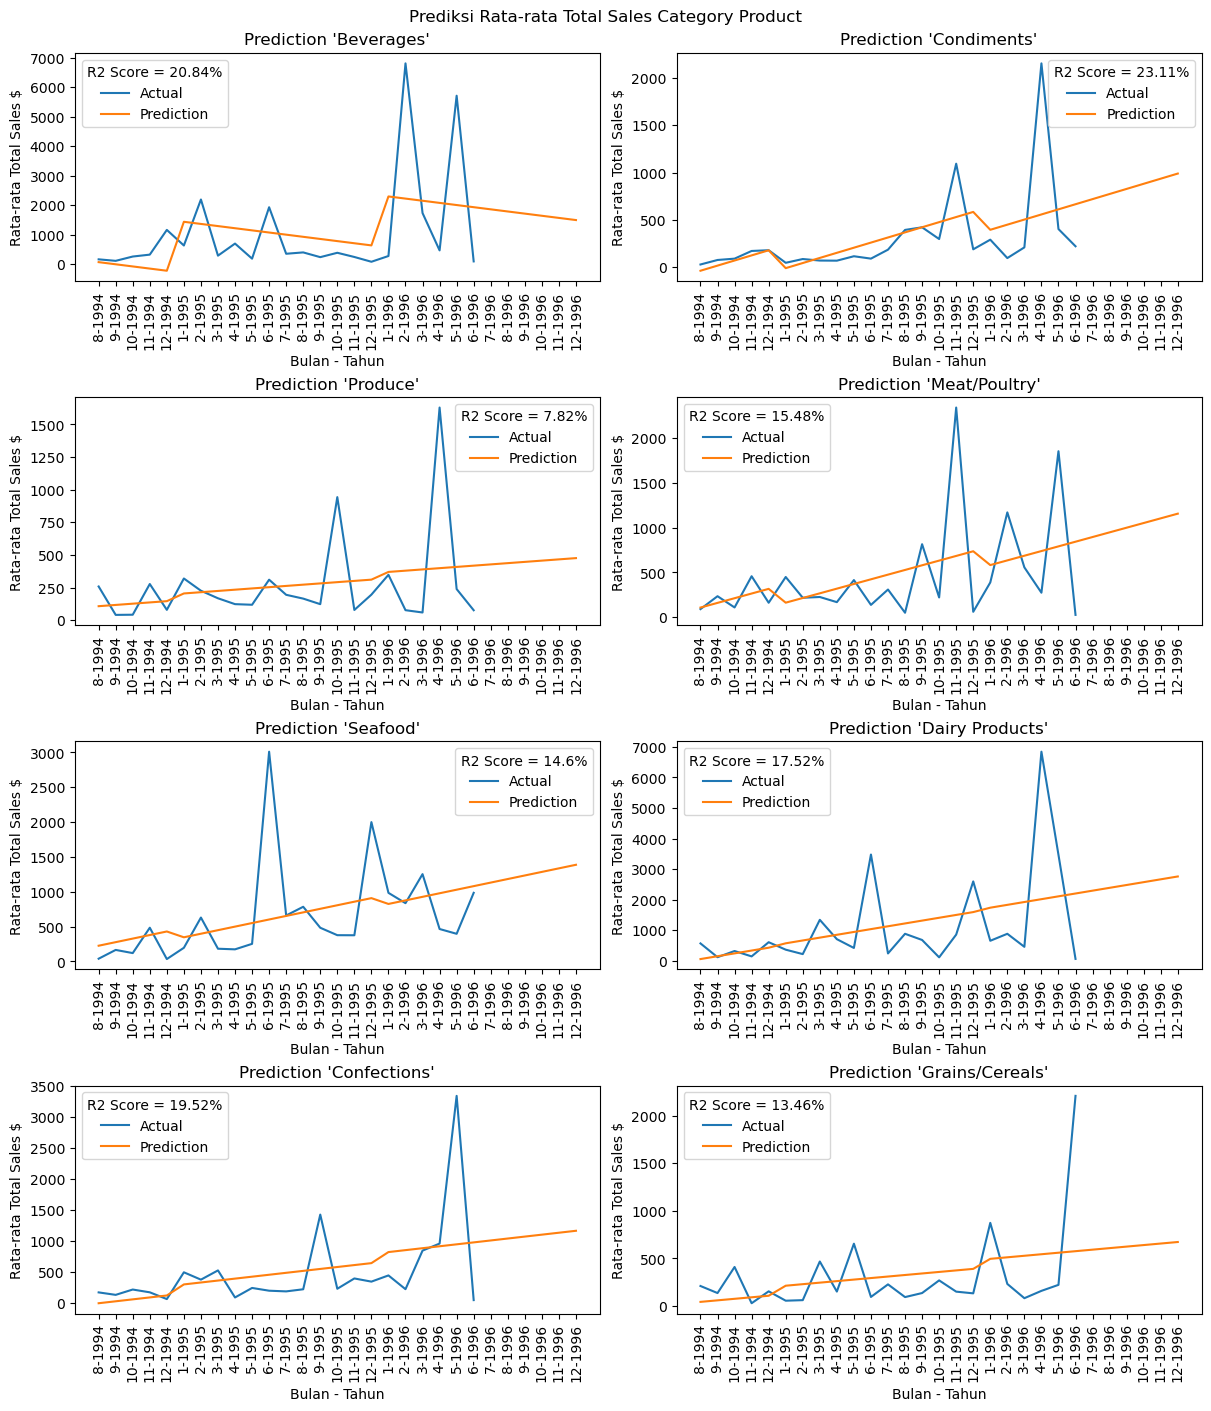

In [18]:
figure, ax = plt.subplots(4, 2, constrained_layout=True, figsize=(12, 14))
figure.suptitle("Prediksi Rata-rata Total Sales Category Product")

i_ = 1
for cat_name, df in result:
    plt.subplot(4, 2, i_)
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]
    
    X_concat = np.concatenate((X, new), axis=0)

    # model = RandomForestRegressor(n_estimators=100, random_state=2).fit(X, y)
    model = LinearRegression().fit(X, y)
    prediction_score = model.score(X, y)*100
    prediction = model.predict(X_concat)

    Xlabel = [f'{i}-{j}' for i, j in X_concat]  

    plt.xticks(rotation=90)
    plt.title(f"Prediction '{cat_name}'")
    plt.ylabel("Rata-rata Total Sales $")
    plt.xlabel("Bulan - Tahun")
    plt.plot(y, label="Actual")
    plt.plot(Xlabel, prediction, label=f"Prediction")
    plt.legend(title=f"R2 Score = {round(prediction_score,2)}%")
    i_ += 1


c:\Users\victo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\victo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\victo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\victo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\victo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\victo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

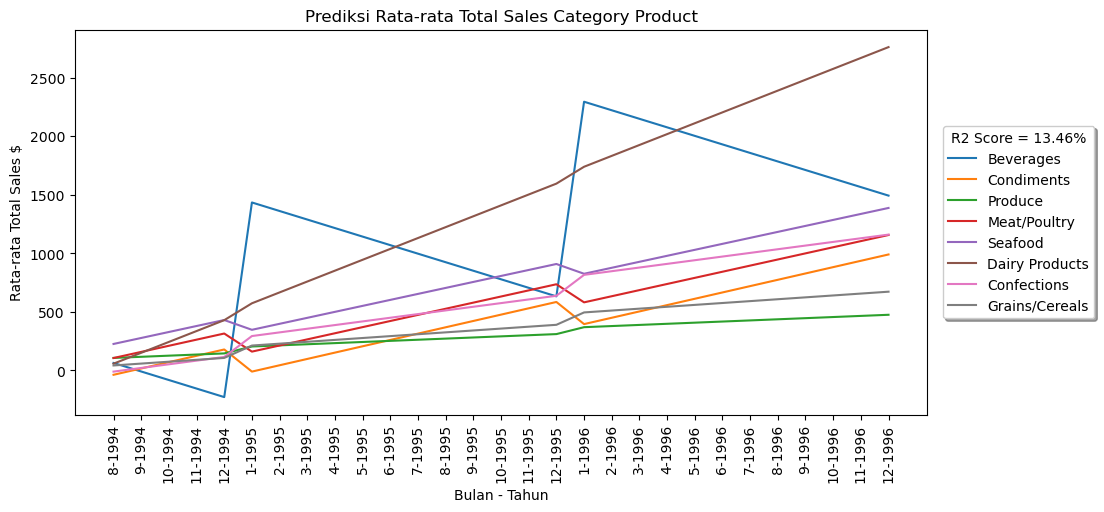

In [19]:
plt.figure(figsize=(11,5))
for cat_name, df in result:
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]
    
    X_concat = np.concatenate((X, new), axis=0)

    # model = RandomForestRegressor(n_estimators=100, random_state=1).fit(X, y)
    model = LinearRegression().fit(X, y)
    prediction_score = model.score(X, y)*100
    prediction = model.predict(X_concat)

    Xlabel = [f'{i}-{j}' for i, j in X_concat]  
    plt.plot(Xlabel, prediction, label=cat_name)

plt.xticks(rotation=90)
plt.title("Prediksi Rata-rata Total Sales Category Product")
plt.legend(title=f"R2 Score = {round(prediction_score,2)}%",
           loc='center left', 
           bbox_to_anchor=(1.01, 0.5), 
           ncol=1, fancybox=True, 
           shadow=True)
plt.ylabel("Rata-rata Total Sales $")
plt.xlabel("Bulan - Tahun")
plt.show()


#### 5. (NIM Genap) Wilayah (country) mana yang paling banyak melakukan order (count) dan paling tinggi nilai order (sum) selama periode data? 

In [20]:
# a
# Wilayah atau Negara/(Country) yang paling banyak melakukan order

    # SELECT 
    #     COUNT(order_details.`Order ID`) AS 'Jumlah Transaksi',
    #     customers.Country,
    #     SUM(order_details.`Unit Price`) AS 'Unit Price',
    #     SUM(order_details.Quantity) AS 'Quantity',
    #     SUM(order_details.`Discount`) AS 'Discount'

_query1 = """
    SELECT 
        customers.Country,
        COUNT(order_details.`Order ID`) AS 'Jumlah Transaksi',
        SUM(order_details.Quantity) AS 'Total Product Terjual'
    FROM order_details
    INNER JOIN orders ON orders.`Order ID` = order_details.`Order ID`
    INNER JOIN customers ON customers.`Company Name` = orders.`Customer Name`
    GROUP BY customers.Country
    ORDER BY `Jumlah Transaksi` DESC;
"""

result = sqldf(_query1)
display(result)

print(f"Wilayah atau Negara/(Country) yang paling banyak melakukan order adalah: {result['Country'][0]}")
print(f"Dengan total order/jumlah transaksi: {result['Jumlah Transaksi'][0]} dari negara '{result['Country'][0]}'")


,Country,Jumlah Transaksi,Total Product Terjual
0,USA,352,9330
1,Germany,328,9213
2,Brazil,203,4247
3,France,184,3254
4,UK,135,2742
5,Austria,125,5167
6,Venezuela,118,2936
7,Sweden,97,2235
8,Canada,75,1984
9,Mexico,72,1025


Wilayah atau Negara/(Country) yang paling banyak melakukan order adalah: USA
Dengan total order/jumlah transaksi: 352 dari negara 'USA'


Text(0, 0.5, 'Country')

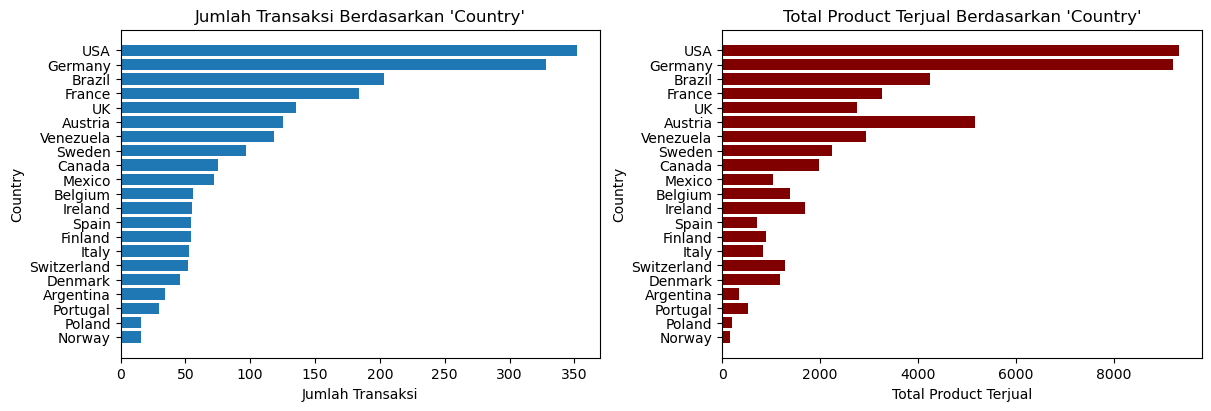

In [21]:
figure, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))

result = result.sort_values('Jumlah Transaksi', ascending=True)

# 1
plt.subplot(1, 2, 1)
# create a horizontal bar plot
plt.barh(result['Country'], result['Jumlah Transaksi'])

# set the title and axis labels
plt.title("Jumlah Transaksi Berdasarkan 'Country'")
plt.xlabel('Jumlah Transaksi')
plt.ylabel('Country')


# 2
plt.subplot(1, 2, 2)
# create a horizontal bar plot
plt.barh(result['Country'], result['Total Product Terjual'], color='maroon')

# set the title and axis labels
plt.title("Total Product Terjual Berdasarkan 'Country'")
plt.xlabel('Total Product Terjual')
plt.ylabel('Country')


In [22]:
# b
# Wilayah atau Negara/(Country) yang paling tinggi nilai sales

_query2 = """
    SELECT 
        COUNT(order_details.`Order ID`) AS 'Jumlah Transaksi',
        customers.Country,
        SUM(order_details.`Unit Price` * order_details.`Quantity` * (1 - order_details.`Discount`)) AS `Total Sales`
    FROM order_details
    INNER JOIN orders ON orders.`Order ID` = order_details.`Order ID`
    INNER JOIN customers ON customers.`Company Name` = orders.`Customer Name`
    GROUP BY customers.Country
    ORDER BY `Total Sales` DESC
"""

result = sqldf(_query2)
display(result)

print(f"Wilayah atau Negara/(Country) yang paling tinggi nilai sales adalah: {result['Country'][0]}")
print(f"Dengan total sales: ${result['Total Sales'][0]:,.5f}")

,Jumlah Transaksi,Country,Total Sales
0,352,USA,245584.6105
1,328,Germany,230284.6335
2,125,Austria,128003.8385
3,203,Brazil,106925.7765
4,184,France,81358.3225
5,135,UK,58971.3100
6,118,Venezuela,56810.6290
7,97,Sweden,54495.1400
8,75,Canada,50196.2900
9,55,Ireland,49979.9050


Wilayah atau Negara/(Country) yang paling tinggi nilai sales adalah: USA
Dengan total sales: $245,584.61050


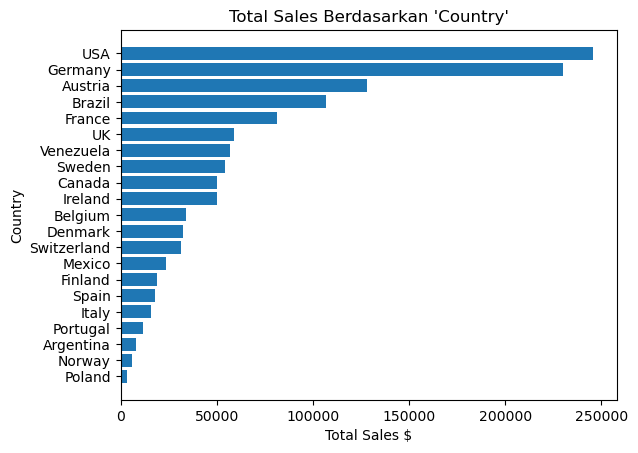

In [23]:
result = result.sort_values('Total Sales', ascending=True)

# create a horizontal bar plot
plt.barh(result['Country'], result['Total Sales'])

# set the title and axis labels
plt.title("Total Sales Berdasarkan 'Country'")
plt.xlabel('Total Sales $')
plt.ylabel('Country')

# show the plot
plt.show()

#### 6. Apakah ada kaitan/relasi antara kategori produk (8 kategori) dengan asal customer (21 country)

In [24]:
_query = """
    SELECT 
        orders.`Order ID`,
        products.`Category Name`,
        customers.Country,
        order_details.`Unit Price`,
        order_details.Quantity,
        order_details.Discount
    FROM orders
    INNER JOIN order_details ON order_details.`Order ID` = orders.`Order ID`
    INNER JOIN customers ON customers.`Company Name` = orders.`Customer Name`
    INNER JOIN products ON products.`Product Name` = order_details.`Product Name`
"""

result = sqldf(_query)
display(result)


# PERFORM ORDINAL ENCODER MANUALLY FOR COLUMN `Category Name` & `Country`
all_category_name = ["Dummy"] + list(sqldf("SELECT DISTINCT(products.`Category Name`) FROM products")['Category Name'])
all_country = ["Dummy"] + list(sqldf("SELECT DISTINCT(customers.Country) FROM customers")['Country'])

_new = []
for i in range(result.shape[0]):
    for j in range(len(all_category_name)):
        if result['Category Name'][i] == all_category_name[j]:
            _new.append(j)
result['Category Name'] = np.array(_new)

_new = []
for i in range(result.shape[0]):
    for j in range(len(all_country)):
        if result['Country'][i] == all_country[j]:
            _new.append(j)
result['Country'] = np.array(_new)

print("After Ordinal Encoder:")
display(result.sample(6))

,Order ID,Category Name,Country,Unit Price,Quantity,Discount
0,10248,Dairy Products,France,34.80,5,0.00
1,10248,Dairy Products,France,14.00,12,0.00
2,10248,Grains/Cereals,France,9.80,10,0.00
3,10249,Produce,Germany,42.40,40,0.00
4,10249,Produce,Germany,18.60,9,0.00
...,...,...,...,...,...,...
2150,11077,Seafood,USA,12.00,3,0.02
2151,11077,Produce,USA,23.25,1,0.03
2152,11077,Grains/Cereals,USA,9.00,2,0.00
2153,11077,Produce,USA,30.00,1,0.05


After Ordinal Encoder:


,Order ID,Category Name,Country,Unit Price,Quantity,Discount
2004,11024,6,3,2.50,30,0.00
1071,10656,3,14,23.25,3,0.10
1499,10823,6,15,21.00,20,0.10
111,10290,2,10,17.00,20,0.00
75,10276,5,2,4.80,10,0.00
1092,10663,8,5,14.00,30,0.05


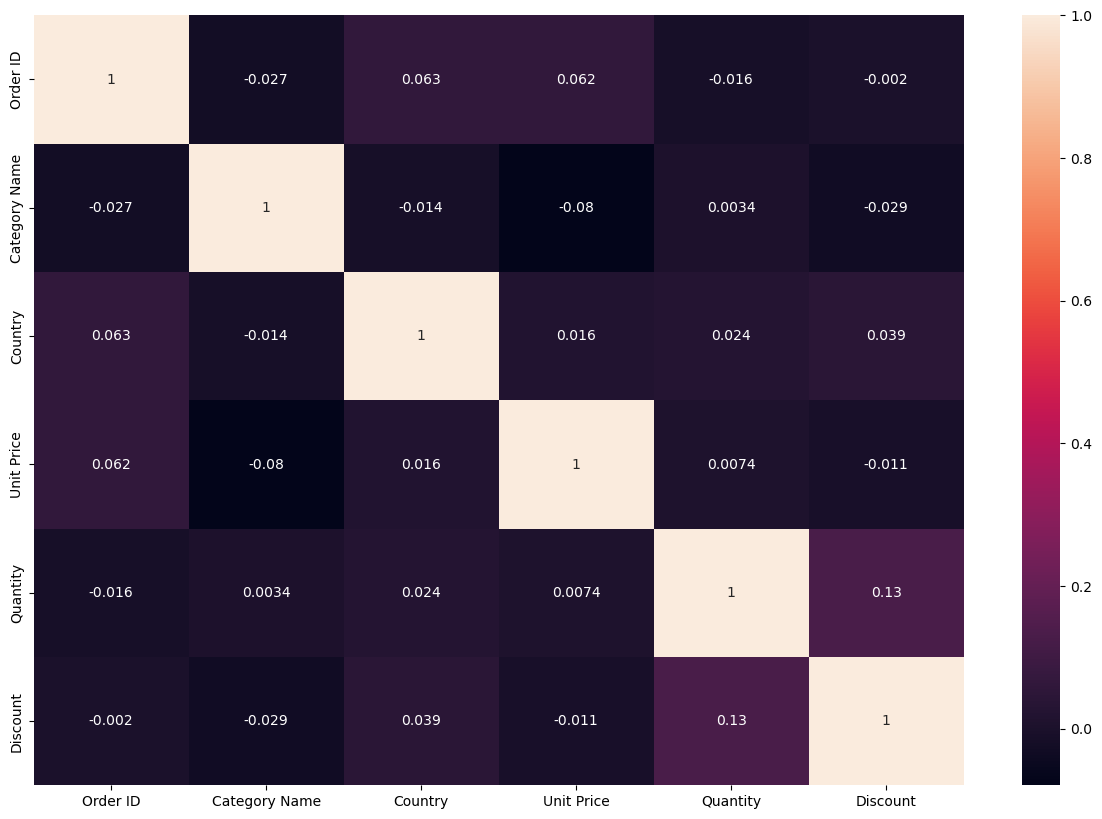

In [25]:
# Matrix correlation
plt.figure(figsize=(15,10))
sns.heatmap(result.iloc[:, :].corr(), annot=True)
plt.show()


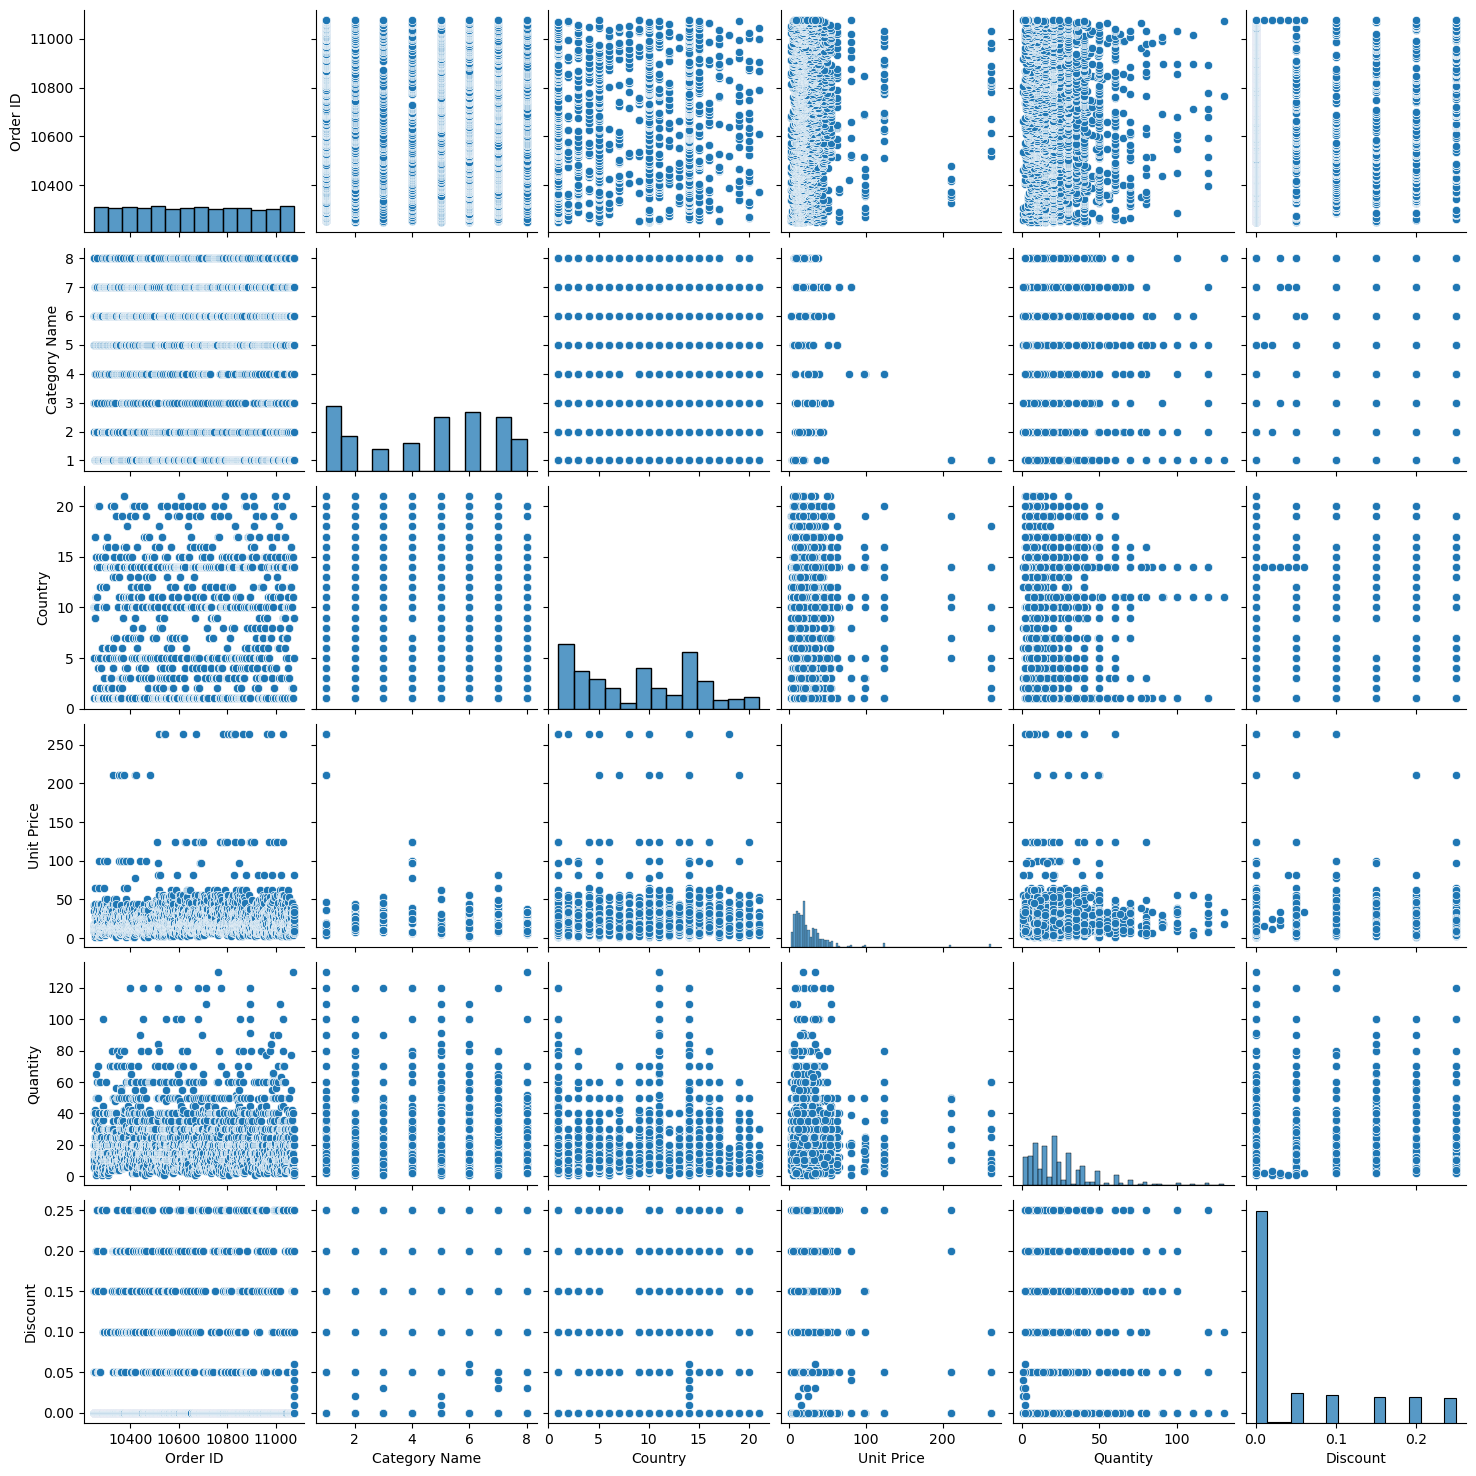

In [26]:
ax = sns.pairplot(result[result.columns])


In [27]:
print(f"Nilai korelasi (`Category Product` - `Country`): {result['Category Name'].corr(result['Country'])}")


Nilai korelasi (`Category Product` - `Country`): -0.014107924449096847


#### 7. Apakah ada pola order kategori produk sepanjang periode data? 

In [28]:
def get_penjualan_kategori_product_berdasarkan_bulan(month_int: int):
    _query = f"""
        SELECT
            CAST(strftime('%m', orders.`Order Date`) AS INT) AS 'Order Month',
            products.`Category Name`,
            AVG(order_details.`Unit Price`) AS 'Rata-rata Harga Unit',
            SUM(order_details.Quantity) AS 'Total Penjualan'
        FROM order_details
        INNER JOIN products ON products.`Product Name` = order_details.`Product Name`
        INNER JOIN orders ON orders.`Order ID` = order_details.`Order ID`
        WHERE `Order Month` = {month_int}
        GROUP BY `Category Name`;
    """
    temp = sqldf(_query)
    
    _query2 = """
        SELECT 
            CASE `Order Month`
                WHEN 1 THEN 'January'
                WHEN 2 THEN 'February'
                WHEN 3 THEN 'March'
                WHEN 4 THEN 'April'
                WHEN 5 THEN 'May'
                WHEN 6 THEN 'June'
                WHEN 7 THEN 'July'
                WHEN 8 THEN 'August'
                WHEN 9 THEN 'September'
                WHEN 10 THEN 'October'
                WHEN 11 THEN 'November'
                WHEN 12 THEN 'December'
            END AS 'Order Month',
            `Category Name`,
            `Rata-rata Harga Unit`,
            `Total Penjualan`,
            (`Rata-rata Harga Unit` * `Total Penjualan`) AS 'Rata-rata Penjualan'
            FROM temp
    """
    return sqldf(_query2)


get_penjualan_kategori_product_berdasarkan_bulan(1)


,Order Month,Category Name,Rata-rata Harga Unit,Total Penjualan,Rata-rata Penjualan
0,January,Beverages,34.913636,803,28035.650000
1,January,Condiments,22.557692,339,7647.057692
2,January,Confections,25.176897,711,17900.773448
3,January,Dairy Products,23.878947,1059,25287.805263
4,January,Grains/Cereals,21.590625,330,7124.906250
5,January,Meat/Poultry,49.343000,568,28026.824000
6,January,Produce,29.539474,510,15065.131579
7,January,Seafood,17.762222,562,9982.368889


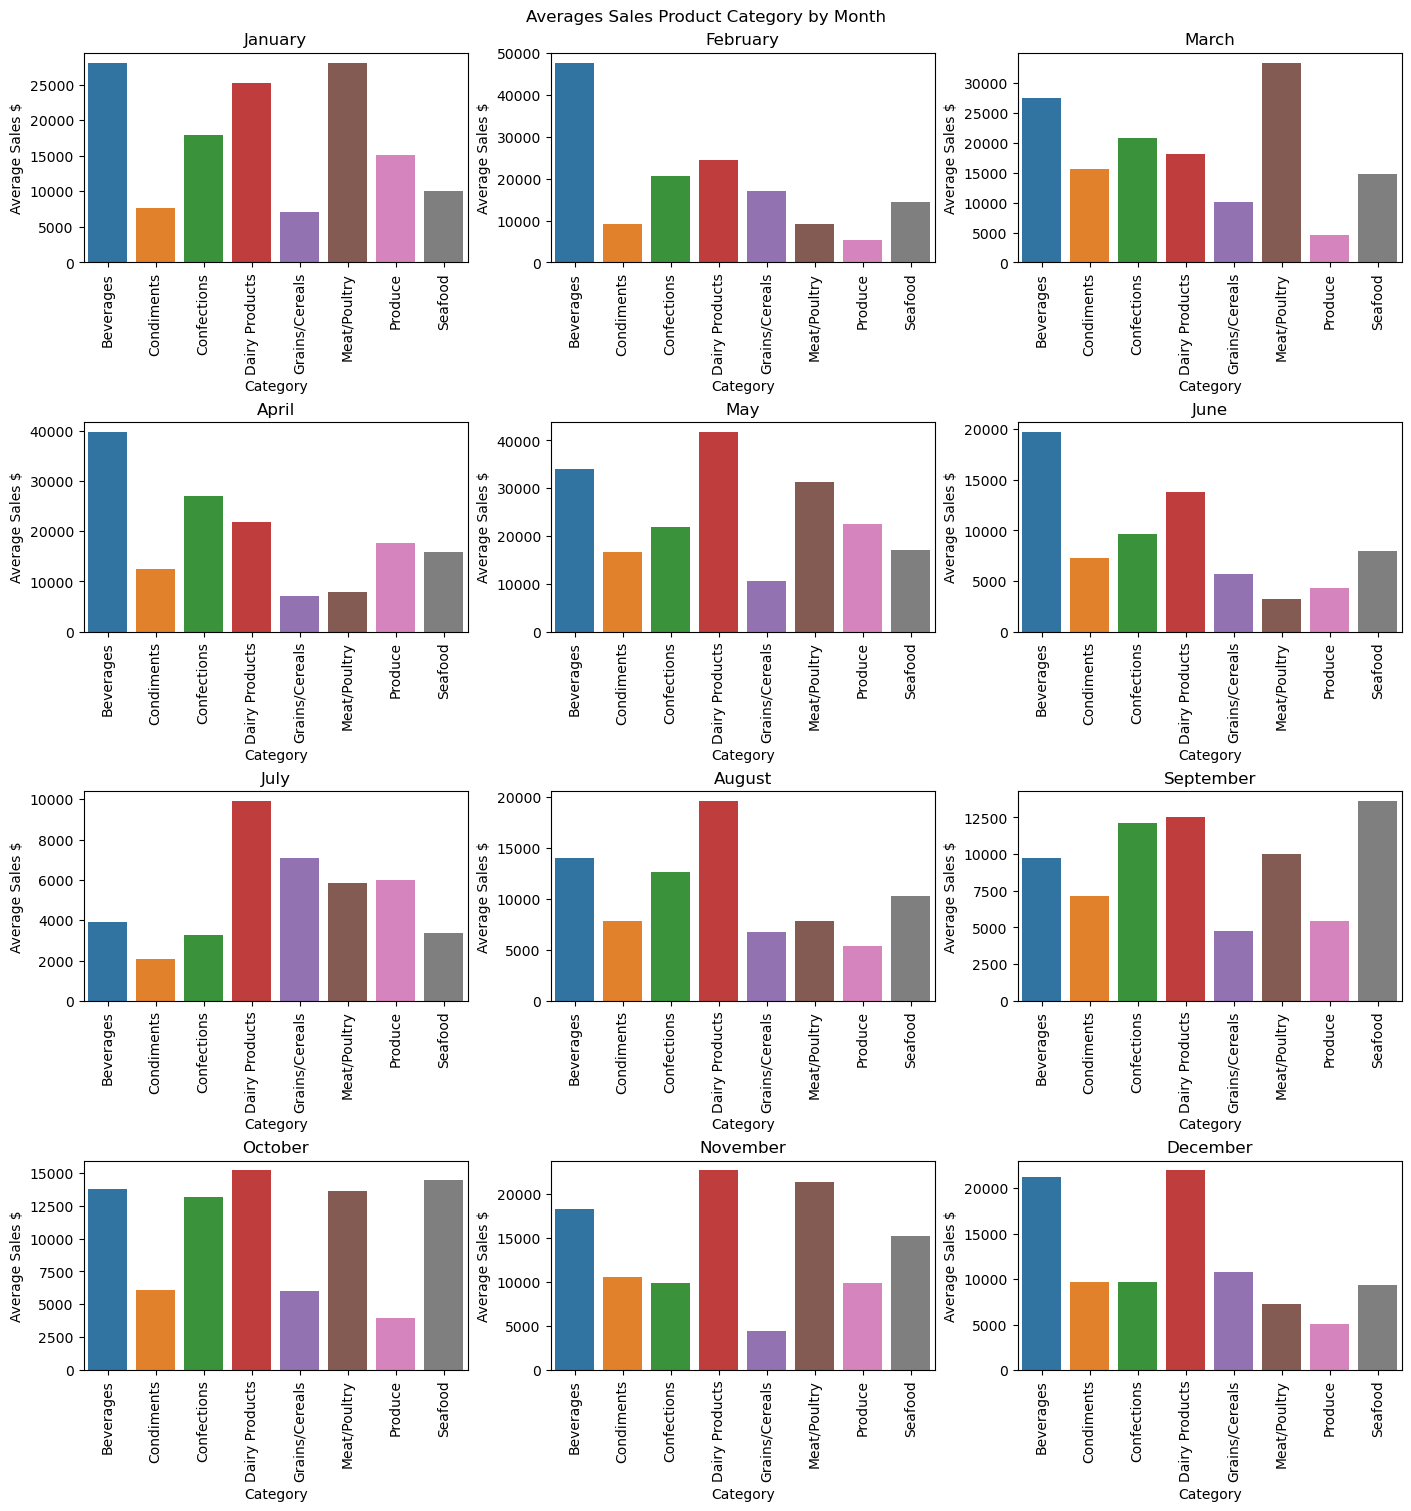

In [29]:
month_name = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

figure, ax = plt.subplots(4, 3, constrained_layout=True, figsize=(14, 15))
figure.suptitle("Averages Sales Product Category by Month")

for i in range(1, 12+1):
    plt.subplot(4, 3, i)
    
    df = get_penjualan_kategori_product_berdasarkan_bulan(i)[["Category Name", "Rata-rata Penjualan"]]
    
    plt.title(f"{month_name[i-1]}")
    plt.xticks(rotation=90)
    
    axes = sns.barplot(x=df["Category Name"], y=df["Rata-rata Penjualan"])
    plt.xlabel('Category')
    plt.ylabel('Average Sales $')


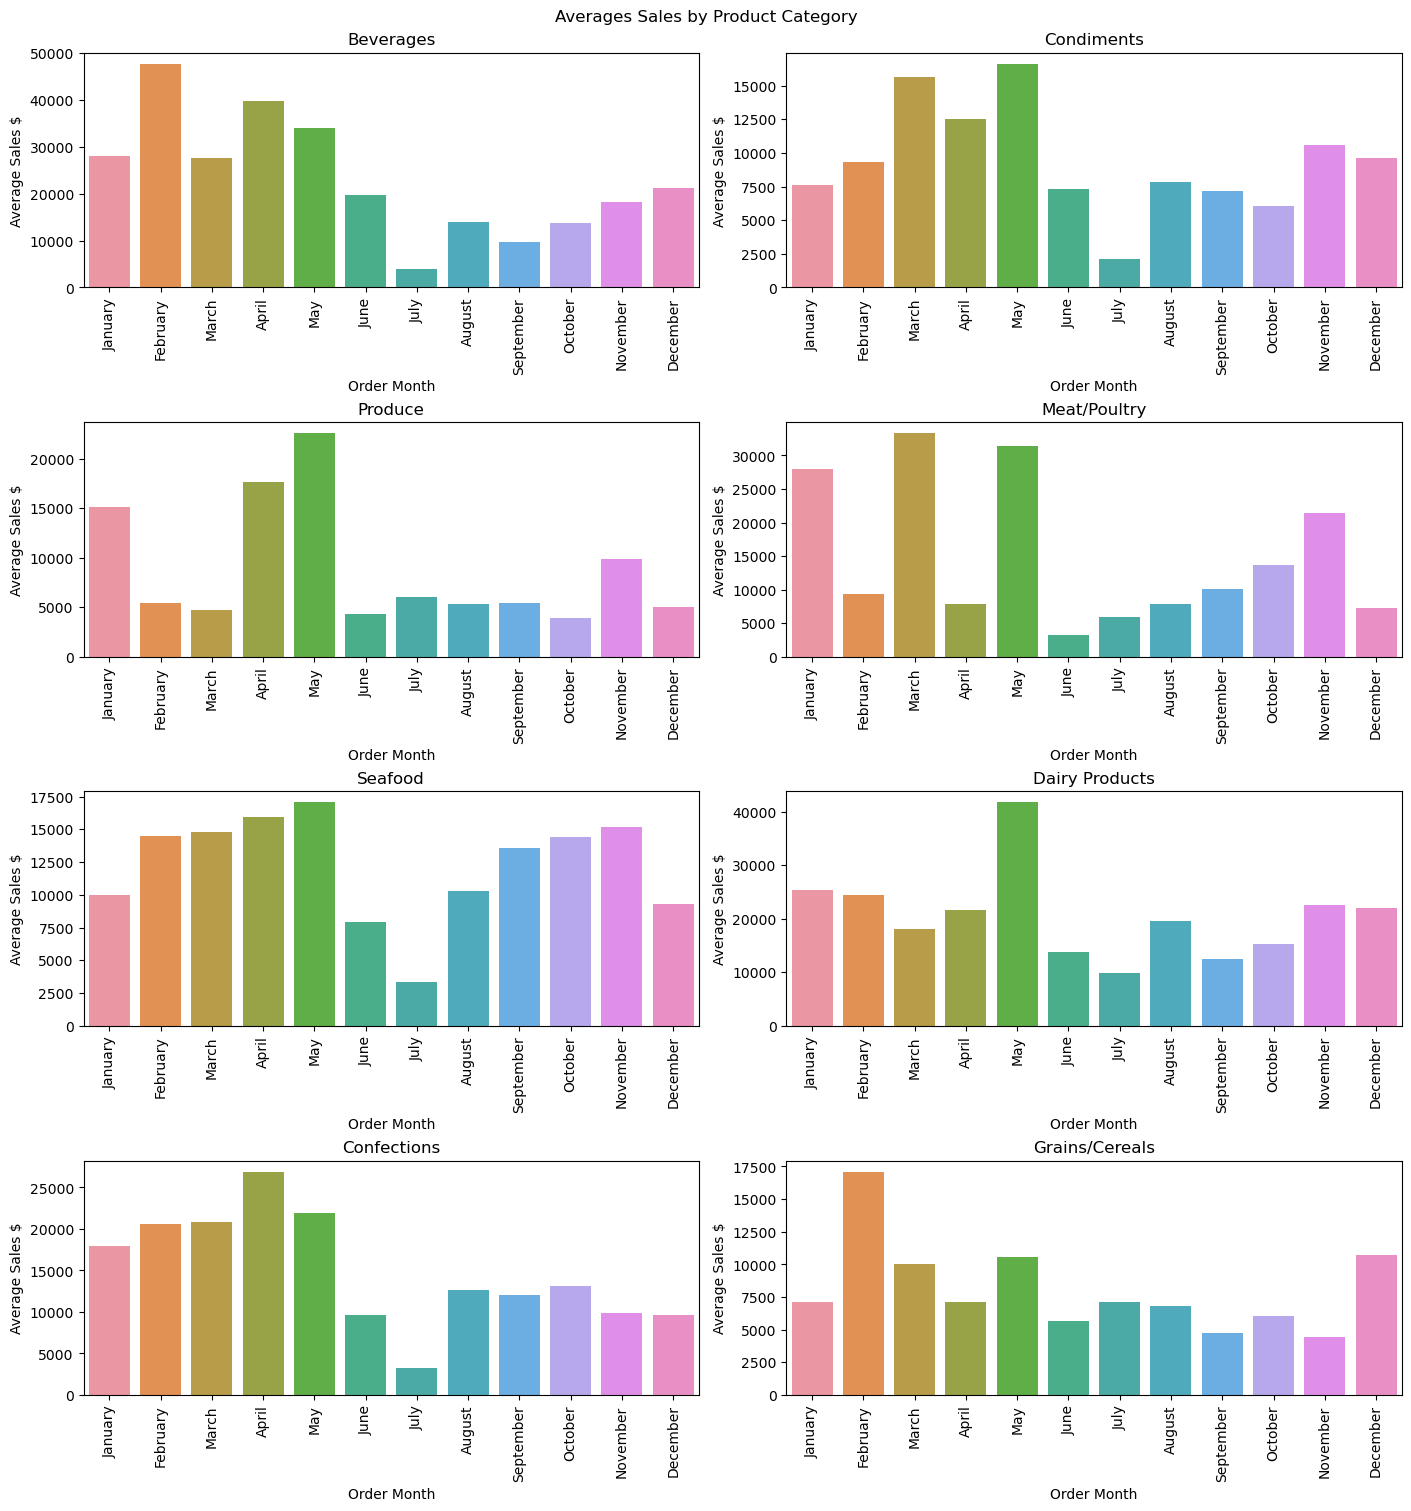

In [30]:
all_category_name = ["Dummy"] + list(sqldf("SELECT DISTINCT(products.`Category Name`) FROM products")['Category Name'])
result = get_penjualan_kategori_product_berdasarkan_bulan(1)
for i in range(2, 12+1):
    result = pd.concat([result, get_penjualan_kategori_product_berdasarkan_bulan(i)], ignore_index=True)


def get_apalah_gk_tahu(category: str):
    _query = f"""
        SELECT 
            `Order Month`,
            `Category Name` ,
            `Rata-rata Penjualan`
        FROM result
        WHERE `Category Name` = '{category}'
        GROUP BY `Order Month`, `Category Name`
        ORDER BY
            CASE `Order Month`
                WHEN 'January' THEN 1
                WHEN 'February' THEN 2
                WHEN 'March' THEN 3
                WHEN 'April' THEN 4
                WHEN 'May' THEN 5
                WHEN 'June' THEN 6
                WHEN 'July' THEN 7
                WHEN 'August' THEN 8
                WHEN 'September' THEN 9
                WHEN 'October' THEN 10
                WHEN 'November' THEN 11
                WHEN 'December' THEN 12
            END;
    """
    return sqldf(_query)


figure, ax = plt.subplots(4, 2, constrained_layout=True, figsize=(14, 15))
figure.suptitle("Averages Sales by Product Category")

for i in range(1, len(all_category_name)):
    plt.subplot(4, 2, i)
    
    df = get_apalah_gk_tahu(all_category_name[i])[["Order Month", "Rata-rata Penjualan"]]
    
    plt.title(f"{all_category_name[i]}")
    plt.xticks(rotation=90)
    
    axes = sns.barplot(x=df["Order Month"], y=df["Rata-rata Penjualan"])
    plt.xlabel('Order Month')
    plt.ylabel('Average Sales $')


#### 8. Kelompokkan wilayah (country) asal customer menjadi 5 kelompok dengan parameter 8 kategori produk berdasarkan nilai total order tiap kategori. 

In [31]:
def get_product_category_based_country(categ: str):
    _query = f"""
        SELECT
            customers.Country,
            products.`Category Name`,
            AVG(order_details.`Unit Price`) AS 'Rata-rata Harga Unit',
            SUM(order_details.Quantity) AS 'Total Penjualan'
        FROM order_details
        INNER JOIN products ON products.`Product Name` = order_details.`Product Name`
        INNER JOIN orders ON orders.`Order ID` = order_details.`Order ID`
        INNER JOIN customers ON customers.`Company Name` = orders.`Customer Name`
        WHERE products.`Category Name` = '{categ}'
        GROUP BY customers.Country;
    """

    return sqldf(_query)


get_product_category_based_country("Beverages").head(3)

,Country,Category Name,Rata-rata Harga Unit,Total Penjualan
0,Argentina,Beverages,54.464286,82
1,Austria,Beverages,31.877273,982
2,Belgium,Beverages,21.954545,272


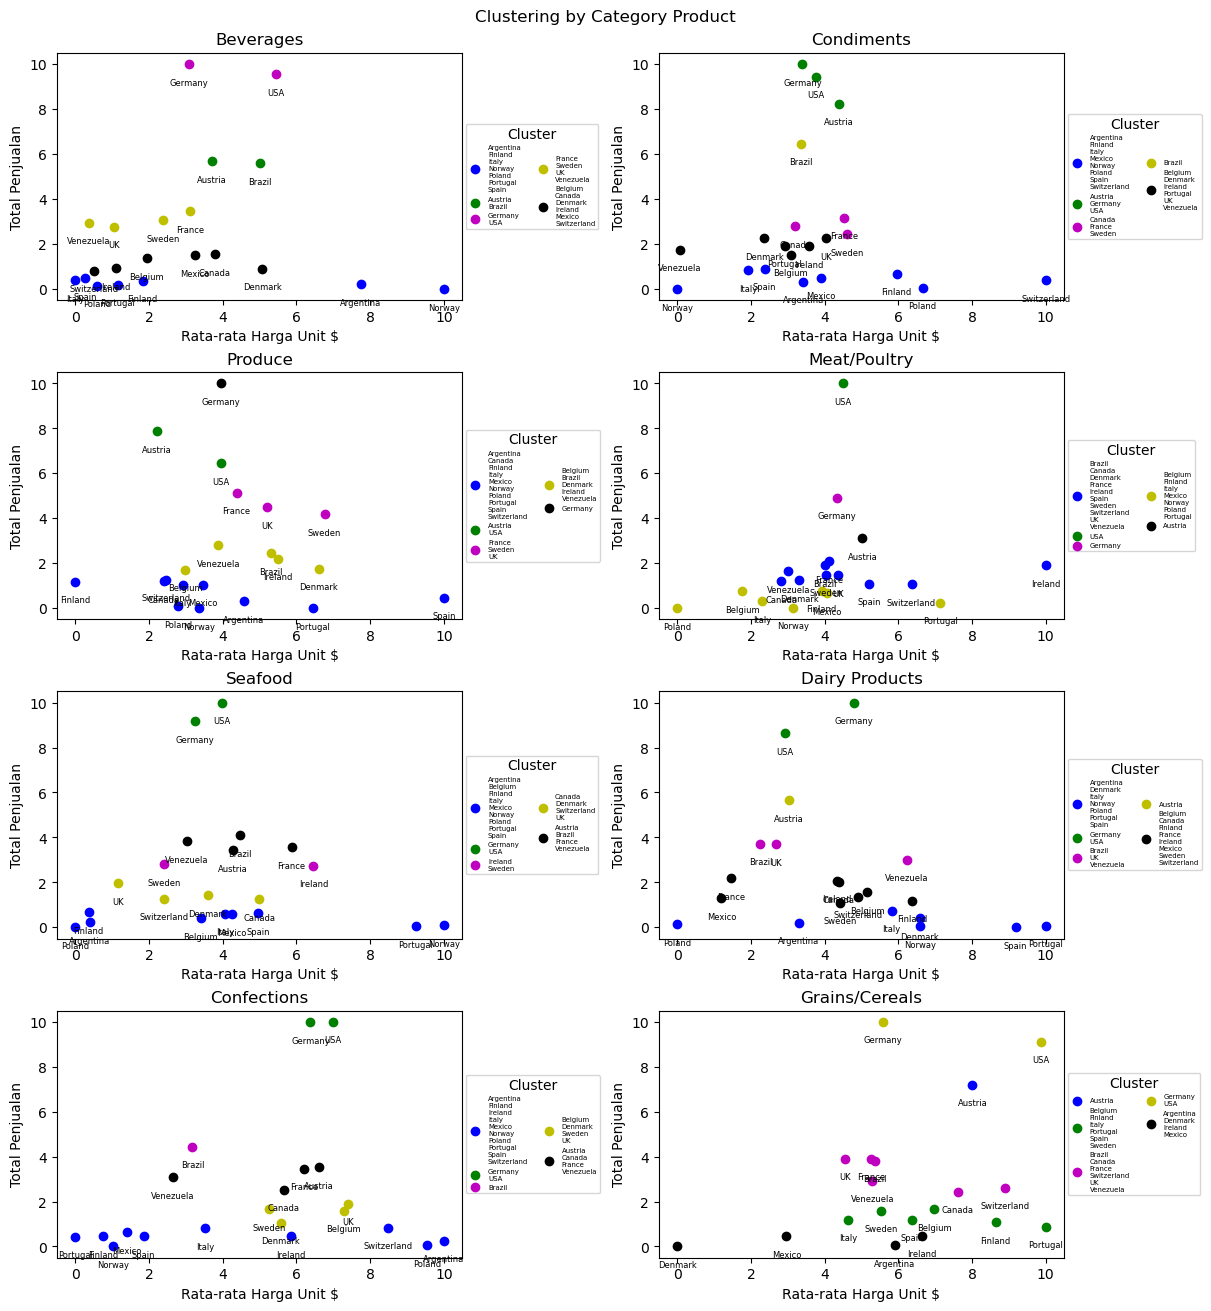

In [32]:
n = 5
all_category_name = list(sqldf("SELECT DISTINCT(products.`Category Name`) FROM products")['Category Name'])

figure, ax = plt.subplots(4, 2, constrained_layout=True, figsize=(12, 13))
figure.suptitle("Clustering by Category Product")

for i in range(len(all_category_name)):
    result = get_product_category_based_country(all_category_name[i])

    # Re-scale data dengan MinMaxScaler
    scaler1 = MinMaxScaler((0, 10))
    temp1 = pd.DataFrame(scaler1.fit_transform(result[['Rata-rata Harga Unit']]))
    result['Rata-rata Harga Unit'] = temp1
    
    scaler2 = MinMaxScaler((0, 10))
    temp2 = pd.DataFrame(scaler2.fit_transform(result[['Total Penjualan']]))
    result['Total Penjualan'] = temp2
    
    kmeans = KMeans(n_clusters=n, random_state=2).fit(temp2)
    label_ = kmeans.fit_predict(temp2)
    result['Cluster'] = label_

    grouped_data = result.groupby('Cluster')['Country'].apply(list).reset_index(name='Group')
    color_ = ['b', 'g', 'm', 'y', 'k']
    
    plt.subplot(4, 2, i+1)
    plt.title(f"{all_category_name[i]}")
    for j in range(n):
        temp = result[result['Cluster'] == j]
        plt.scatter(x=temp['Rata-rata Harga Unit'], 
                    y=temp['Total Penjualan'], 
                    cmap='Set1',
                    color=color_[j],
                    label="\n".join(grouped_data['Group'][j]))
        
        # Add annotations to each data point
        for index, row in temp.iterrows():
            plt.annotate(row['Country'], 
                 (row['Rata-rata Harga Unit'], row['Total Penjualan']), 
                 xytext=(0,-10), # add a small offset to the y-coordinate
                 textcoords='offset points',
                 ha='center', va='top', 
                 fontsize=6)
        

    plt.legend(title="Cluster", fontsize=5, ncol=2, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xlabel("Rata-rata Harga Unit $")
    plt.ylabel("Total Penjualan")


### Proyek B (4 Poin)

Sebuah toko aksesoris retail online ingin menganalisa perilaku konsumen dalam membeli barang yang mereka 
tawarkan, sehingga mereka dapat mengatur display barang dengan baik untuk kenyamanan konsumen dan 
mengatur promo dengan lebih tepat. Mereka meminta bantuan Anda menganalisis data untuk tujuan tersebut. 
Bebas menggunakan alat bantu (excel, rapidminer, python, dll). 

Requirement:
1. mlxtend

```
!conda install --yes -c conda-forge mlxtend
```

In [33]:
# Import library needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandasql import sqldf
from mlxtend.frequent_patterns import association_rules, apriori


In [34]:
# !conda install --yes -c conda-forge mlxtend

In [35]:
# Read dataset
online_retail = pd.read_excel("Online Retail.xlsx")
display(online_retail.sample(5))
shape_before_drop = online_retail.shape
print(shape_before_drop)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
511456,579501,23318,BOX OF 6 MINI VINTAGE CRACKERS,12,2011-11-29 16:16:00,2.08,14088.0,United Kingdom
49759,540530,22113,GREY HEART HOT WATER BOTTLE,4,2011-01-09 14:02:00,3.75,14755.0,United Kingdom
454925,575607,21422,PORCELAIN ROSE SMALL,1,2011-11-10 12:37:00,1.63,14096.0,United Kingdom
178749,552234,22501,PICNIC BASKET WICKER LARGE,1,2011-05-06 16:01:00,20.79,NaN,United Kingdom
330624,565919,85087,CANDY SPOT CUSHION COVER,1,2011-09-07 16:48:00,3.29,NaN,United Kingdom


(541909, 8)


In [36]:
# Cek ada kosong atau tidak
online_retail.isnull().any()

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

In [37]:
# Terdapat baris yang kosong, sehingga perlu dihapus
online_retail = online_retail.dropna()

In [38]:
# Cek apakah sudah bersih dari data kosong?
online_retail.isnull().any()

InvoiceNo      False
StockCode      False
Description    False
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID     False
Country        False
dtype: bool

In [39]:
print(f"DataFrame shape after drop empty row:\n{online_retail.shape}\n")
print(f"Total row yang kosong:\n{shape_before_drop[0] - online_retail.shape[0]:,}")


DataFrame shape after drop empty row:
(406829, 8)

Total row yang kosong:
135,080


Terdapat nilai kosong pada kolom `Description` dan `CustomerID`

In [40]:
# Cek tipe data setiap kolom
online_retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [41]:
# Total banyaknya transaksi
online_retail['InvoiceNo'].nunique()

22190

In [42]:
def categorize_time_of_day(time):
    if time.hour >= 0 and time.hour < 5:
        return 'Midnight'
    elif time.hour >= 5 and time.hour < 12:
        return 'Morning'
    elif time.hour >= 12 and time.hour < 16:
        return 'Afternoon'
    elif time.hour >= 16 and time.hour < 19:
        return 'Evening'
    else:
        return 'Night'


# Extract Date
online_retail['Date'] = online_retail['InvoiceDate'].dt.date

# Extract Time
online_retail['Time'] = online_retail['InvoiceDate'].dt.time

# Extract PeriodDay
online_retail['PeriodDay'] = online_retail['InvoiceDate'].apply(categorize_time_of_day)

# Extract Day
online_retail['Day'] = online_retail['InvoiceDate'].dt.weekday
online_retail['Day'] = online_retail['Day'].replace(
    (0,1,2,3,4,5,6), ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))

# Extract Month
online_retail['Month'] = online_retail['InvoiceDate'].dt.month
online_retail['Month'] = online_retail['Month'].replace(
    (1,2,3,4,5,6,7,8,9,10,11,12), 
    ('January','February','March','April','May','June','July','August', 'September','October','November','December')
)

# Extracting hour
online_retail['Hour'] = online_retail['InvoiceDate'].dt.hour
# Replacing hours with text
hour_in_num = (1,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23)
hour_in_obj = ('1-2','7-8','8-9','9-10','10-11','11-12','12-13','13-14','14-15',
               '15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-24')
online_retail['Hour'] = online_retail['Hour'].replace(hour_in_num, hour_in_obj)

# Drop timestamp column after separate
online_retail.drop("InvoiceDate", axis=1, inplace=True)

online_retail.head()


,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Time,PeriodDay,Day,Month,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,Morning,Wednesday,December,8-9
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,Morning,Wednesday,December,8-9
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,Morning,Wednesday,December,8-9
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,Morning,Wednesday,December,8-9
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,Morning,Wednesday,December,8-9


In [43]:
# cleaning the item column
online_retail['InvoiceNo'] = online_retail['InvoiceNo'].str.strip()

online_retail['StockCode'] = online_retail['StockCode'].str.strip()

online_retail['Description'] = online_retail['Description'].str.strip()

online_retail['Country'] = online_retail['Country'].str.strip()


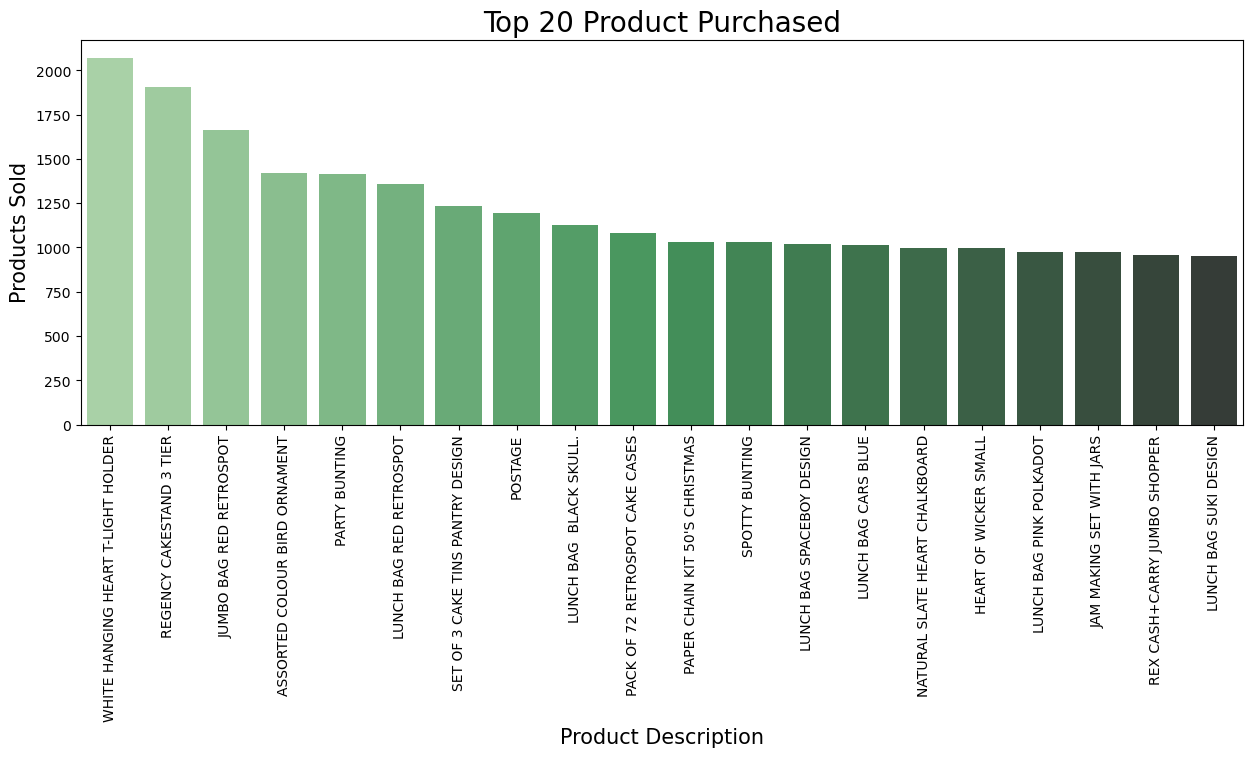

In [44]:
plt.figure(figsize=(15, 5))
sns.barplot(x=online_retail.Description.value_counts().head(20).index, y=online_retail.Description.value_counts().head(20).values, palette='Greens_d')
plt.title('Top 20 Product Purchased', size=20)
plt.xlabel('Product Description', size=15)
plt.ylabel('Products Sold', size=15)
plt.xticks(rotation=90)
plt.show()


Product terlaris sepanjang data record adalah WHITE HANGING HEART T-LIGHT HOLDER

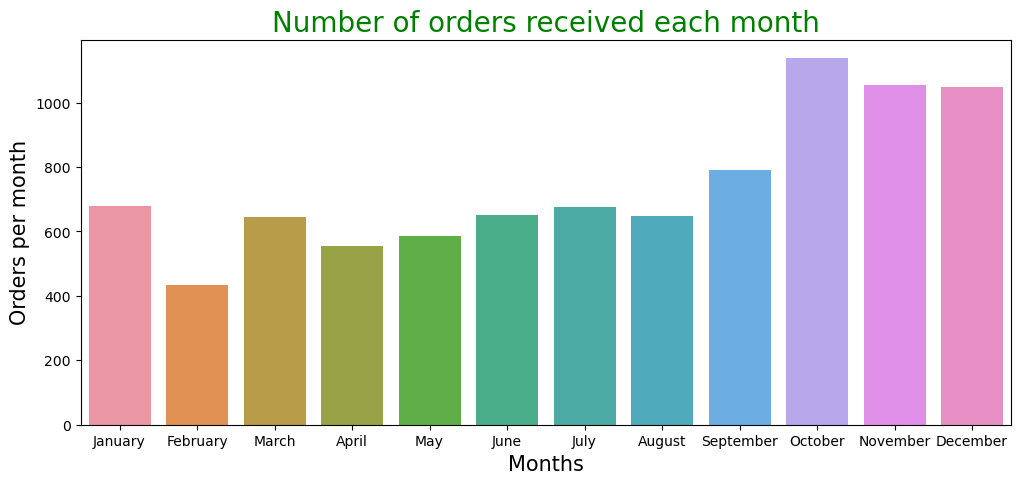

In [45]:
monthTran = online_retail.groupby('Month')['InvoiceNo'].count().reset_index()
monthTran.loc[:,"monthorder"] = [4,8,12,2,1,7,6,3,5,11,10,9]
monthTran.sort_values("monthorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data=monthTran, x="Month", y="InvoiceNo")
plt.xlabel('Months', size=15)
plt.ylabel('Orders per month', size=15)
plt.title('Number of orders received each month', color='green', size=20)
plt.show()


Transaksi terbanyak ada di akhir tahun atau di bulan Oktober, Desember, dan November

In [46]:
sqldf(
"""
    SELECT DISTINCT Day
        FROM online_retail
        ORDER BY 
            CASE Day
                WHEN 'Sunday' THEN 0
                WHEN 'Monday' THEN 1
                WHEN 'Tuesday' THEN 2
                WHEN 'Wednesday' THEN 3
                WHEN 'Thursday' THEN 4
                WHEN 'Friday' THEN 5
                WHEN 'Saturday' THEN 6
            END;
"""
)


,Day
0,Sunday
1,Monday
2,Tuesday
3,Wednesday
4,Thursday
5,Friday


Dari query di atas, sepanjang record data, tidak ada transaksi di hari Sabtu

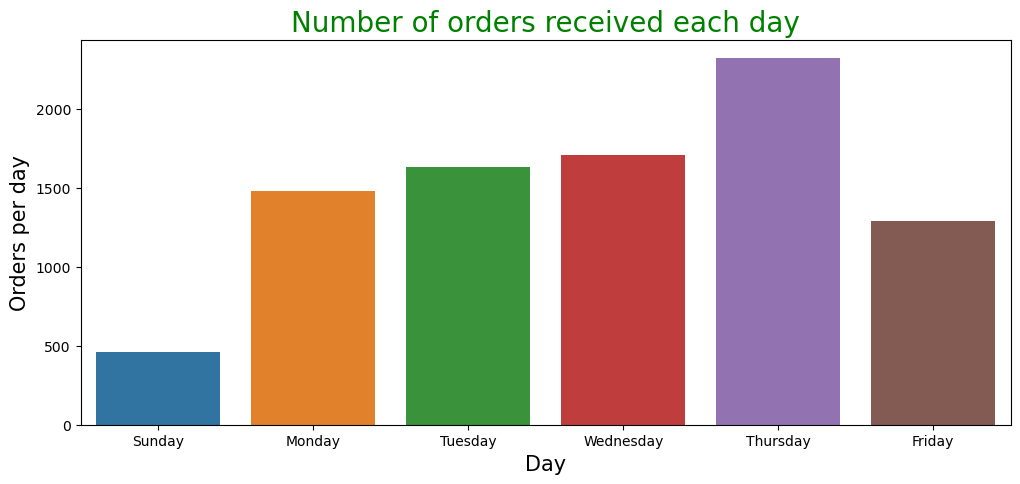

In [47]:
weekTran = online_retail.groupby('Day')['InvoiceNo'].count().reset_index()
weekTran.loc[:,"weekorder"] = [5, 1, 0, 4, 2, 3]
weekTran.sort_values("weekorder",inplace=True)

plt.figure(figsize=(12, 5))
sns.barplot(data=weekTran, x="Day", y="InvoiceNo")
plt.title('Number of orders received each day', color='green', size=20)
plt.xlabel('Day', size=15)
plt.ylabel('Orders per day', size=15)
plt.show()


Transaksi terbanyak adalah di hari Kamis, dan transaksi paling sedikit hari Minggu. <br>

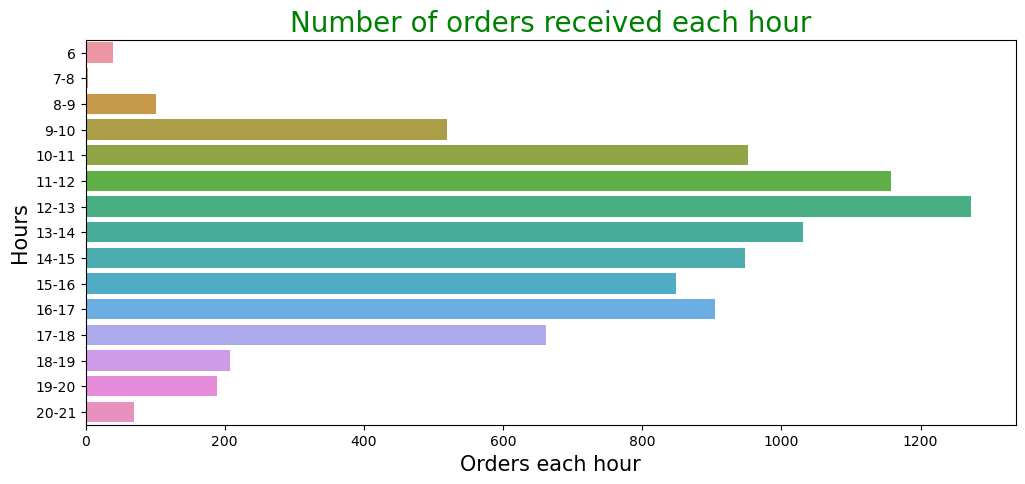

In [48]:
hourTran = online_retail.groupby('Hour')['InvoiceNo'].count().reset_index()
hourTran.loc[:,"hourorder"] = [0,4,5,6,7,8,9,10,11,12,13,14,1,2,3]
hourTran.sort_values("hourorder",inplace=True)

plt.figure(figsize=(12, 5))
sns.barplot(data=hourTran, x="InvoiceNo", y="Hour")
plt.ylabel('Hours', size=15)
plt.xlabel('Orders each hour', size=15)
plt.title('Number of orders received each hour', color='green', size=20)
plt.show()


Transaksi terbanyak setiap jamnya adalah dari jam 11-14 <br>
Dan transaksi terendah setiap jamnya berada di awal ketika toko baru buka, yaitu jam 6-8

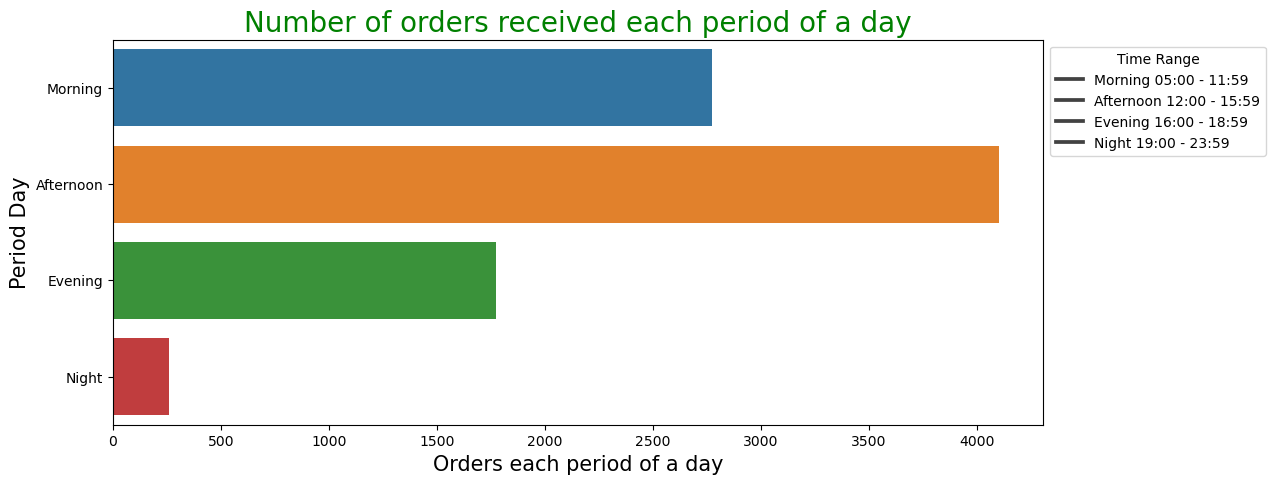

In [49]:
dayTran = online_retail.groupby('PeriodDay')['InvoiceNo'].count().reset_index()
dayTran.loc[:,"hourorder"] = [2,3,1,4]
dayTran.sort_values("hourorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data=dayTran, x="InvoiceNo", y="PeriodDay")
plt.ylabel('Period Day', size=15)
plt.xlabel('Orders each period of a day', size=15)
plt.title('Number of orders received each period of a day', color='green', size=20)
plt.legend(title='Time Range', labels=["Morning 05:00 - 11:59", 
                                       'Afternoon 12:00 - 15:59',
                                       'Evening 16:00 - 18:59',
                                       'Night 19:00 - 23:59'], 
           bbox_to_anchor=(1, 1), loc='upper left')
plt.show()


Orang-orang melakukan transaksi paling banyak di pagi dan siang hari, yaitu dari jam 05:00 - 15:59

<h3>Apriori Algorithm</h3>

In [51]:
transactions_str = online_retail.groupby(['InvoiceNo', 'Description'])['Description'].count().reset_index(name='Count')
transactions_str

,InvoiceNo,Description,Count
0,C536379,Discount,1
1,C536383,SET OF 3 COLOURED FLYING DUCKS,1
2,C536391,CHICK GREY HOT WATER BOTTLE,1
3,C536391,PACK OF 12 BLUE PAISLEY TISSUES,1
4,C536391,PACK OF 12 PINK PAISLEY TISSUES,1
...,...,...,...
8800,C581490,ZINC T-LIGHT HOLDER STARS SMALL,1
8801,C581499,Manual,1
8802,C581568,VICTORIAN SEWING BOX LARGE,1
8803,C581569,36 PENCILS TUBE RED RETROSPOT,1


In [52]:
# making a mxn matrice where m=transaction and n=items and each row represents whether the item was in the transaction or not
my_basket = transactions_str.pivot_table(index='InvoiceNo', columns='Description', values='Count', aggfunc='sum').fillna(0)

my_basket.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEARTS PLANT POT HOLDER,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
C536379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C536383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C536391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C536506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C536543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
# making a function which returns 0 or 1
# 0 means item was not in that transaction, 1 means item present in that transaction

def encode(x):
    if x<=0:
        return 0
    if x>= 1:
        return 1

# applying the function to the dataset

my_basket_sets = my_basket.applymap(encode)
my_basket_sets.head()


Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEARTS PLANT POT HOLDER,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
C536379,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C536383,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C536391,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C536506,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C536543,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
# using the 'apriori algorithm' with min_support=0.0015 (0.13% of 25900)
# It means the item should be present in atleast 936 transaction out of 25900 transactions only when we considered that item in
# frequent itemset
frequent_items = apriori(my_basket_sets, min_support = 0.0013,use_colnames = True)
frequent_items

c:\Users\victo\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.001916,(10 COLOUR SPACEBOY PEN)
1,0.006021,(15CM CHRISTMAS GLASS BALL 20 LIGHTS)
2,0.001368,(3 DRAWER ANTIQUE WHITE WOOD CABINET)
3,0.002189,(3 HEARTS HANGING DECORATION RUSTIC)
4,0.002189,(3 HOOK HANGER MAGIC GARDEN)
...,...,...
597,0.001916,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY..."
598,0.001368,"(LUNCH BAG BLACK SKULL., JUMBO BAG RED RETROS..."
599,0.001368,"(LUNCH BAG CARS BLUE, LUNCH BAG RED RETROSPOT,..."
600,0.001642,"(PINK REGENCY TEACUP AND SAUCER, REGENCY CAKES..."


In [55]:
# now making the rules from frequent itemset generated above

rules = association_rules(frequent_items, metric="lift", min_threshold=1)
rules.sort_values('confidence', ascending=False, inplace=True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
30,(GIRAFFE WOODEN RULER),(REVOLVER WOODEN RULER),0.001368,0.001916,0.001368,1.000000,522.000000,0.001366,inf
171,"(ALARM CLOCK BAKELIKE ORANGE, ALARM CLOCK BAKE...",(ALARM CLOCK BAKELIKE RED),0.001368,0.008210,0.001368,1.000000,121.800000,0.001357,inf
190,"(LUNCH BAG RED RETROSPOT, LUNCH BAG WOODLAND)",(LUNCH BAG CARS BLUE),0.001642,0.006294,0.001368,0.833333,132.391304,0.001358,5.962233
200,"(SET OF TEA COFFEE SUGAR TINS PANTRY, SET OF 3...",(SET OF 3 REGENCY CAKE TINS),0.001642,0.010126,0.001368,0.833333,82.297297,0.001352,5.939245
183,"(LUNCH BAG RED RETROSPOT, LUNCH BAG BLACK SKU...",(JUMBO BAG RED RETROSPOT),0.001642,0.011768,0.001368,0.833333,70.813953,0.001349,5.929392
...,...,...,...,...,...,...,...,...,...
198,(REGENCY CAKESTAND 3 TIER),"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",0.049261,0.004105,0.001642,0.033333,8.120000,0.001440,1.030236
145,(REGENCY CAKESTAND 3 TIER),(WOODEN FRAME ANTIQUE WHITE),0.049261,0.004105,0.001368,0.027778,6.766667,0.001166,1.024349
138,(REGENCY CAKESTAND 3 TIER),(SET OF 3 REGENCY CAKE TINS),0.049261,0.010126,0.001368,0.027778,2.743243,0.000870,1.018156
114,(REGENCY CAKESTAND 3 TIER),(MINT KITCHEN SCALES),0.049261,0.003558,0.001368,0.027778,7.807692,0.001193,1.024912


In [56]:
# arranging the data from highest to lowest with respect to 'confidence'
rules.sort_values('confidence', ascending=False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
30,(GIRAFFE WOODEN RULER),(REVOLVER WOODEN RULER),0.001368,0.001916,0.001368,1.000000,522.000000,0.001366,inf
171,"(ALARM CLOCK BAKELIKE ORANGE, ALARM CLOCK BAKE...",(ALARM CLOCK BAKELIKE RED),0.001368,0.008210,0.001368,1.000000,121.800000,0.001357,inf
190,"(LUNCH BAG RED RETROSPOT, LUNCH BAG WOODLAND)",(LUNCH BAG CARS BLUE),0.001642,0.006294,0.001368,0.833333,132.391304,0.001358,5.962233
200,"(SET OF TEA COFFEE SUGAR TINS PANTRY, SET OF 3...",(SET OF 3 REGENCY CAKE TINS),0.001642,0.010126,0.001368,0.833333,82.297297,0.001352,5.939245
183,"(LUNCH BAG RED RETROSPOT, LUNCH BAG BLACK SKU...",(JUMBO BAG RED RETROSPOT),0.001642,0.011768,0.001368,0.833333,70.813953,0.001349,5.929392
...,...,...,...,...,...,...,...,...,...
198,(REGENCY CAKESTAND 3 TIER),"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",0.049261,0.004105,0.001642,0.033333,8.120000,0.001440,1.030236
145,(REGENCY CAKESTAND 3 TIER),(WOODEN FRAME ANTIQUE WHITE),0.049261,0.004105,0.001368,0.027778,6.766667,0.001166,1.024349
138,(REGENCY CAKESTAND 3 TIER),(SET OF 3 REGENCY CAKE TINS),0.049261,0.010126,0.001368,0.027778,2.743243,0.000870,1.018156
114,(REGENCY CAKESTAND 3 TIER),(MINT KITCHEN SCALES),0.049261,0.003558,0.001368,0.027778,7.807692,0.001193,1.024912


#### Komitmet Integritas
![alternatvie text](Komitmen_Integritas.jpg)